# 泊松分布的简介、代码实现与概率分布图像

泊松分布的概率分布，概率质量函数：

$$
P(X = k) =
\frac
    {e^{-\lambda} \lambda^k}
    {k!}
\tag{0.1}
$$

-----------

泊松分布的期望是$\lambda$：

$$
\begin{aligned}
E(X) &=
 \sum\limits
    _{k=0}^{\infty}
    k P(k) \\
&= \lambda
\end{aligned}
\tag{0.2}
$$

-------

任何分布的所有情况概率总和 是 1：

$$
\begin{aligned}
P(ALL)
&= 
\sum\limits
    _{k=0}^{\infty}
    P(k)
\\&
= 1 
\end{aligned}
\tag{0.3}
$$

更说明参见：

- [泊松分布 - MBA智库百科](https://wiki.mbalib.com/wiki/%E6%B3%8A%E6%9D%BE%E5%88%86%E5%B8%83)
- [正态分布、泊松分布和伯努利分布 - CSDN博客](https://blog.csdn.net/weixin_42034505/article/details/81432385)

# 1. 泊松分布的概率分布/概率质量函数的实现

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sc


def poisson(lmd, k, exact=False):
    """
    泊松分布
    :param lmd: 泊松分布的 λ 参数（向量/标量）。
                对应限流问题的『单机收到的`QPS`』（压测发出的`QPS`实际上是平均值/期望）
    :param k: 观察到的次数，随机变量（向量/标量），函数返回的是 X = k次 时概率
              关联的是 限流问题中的『单机限流`QPS`』；X > 单机的限流`QPS`时，即出现限流。
    :param exact: `factorial`运算时是否`exact`
    :return: poisson(λ, k)的概率值（向量/标量）
              与 限流问题中的『限流比率』 相关，具体关系，在下面Cell中展开说明
    """
    return np.exp(-lmd) * np.power(lmd, k) / sc.factorial(k, exact=exact)

# 2. 泊松分布概率分布/概率质量函数的图像

查看概率分布可以有一些更直观的感受。

## 2.1 给定流量`QPS`($\lambda$)下， 观察到的`QPS`($k$) 与 出现概率 的关系

为了避免数据比例差异过大、小比例的部分图像被压扁而不能有效查看，分成2情况绘制函数图像：

- 大流量`QPS`：$\lambda >= 2$
- 小流量`QPS`：$\lambda <= 2$

### 2.1.1 大流量`QPS`：$\lambda >= 2$

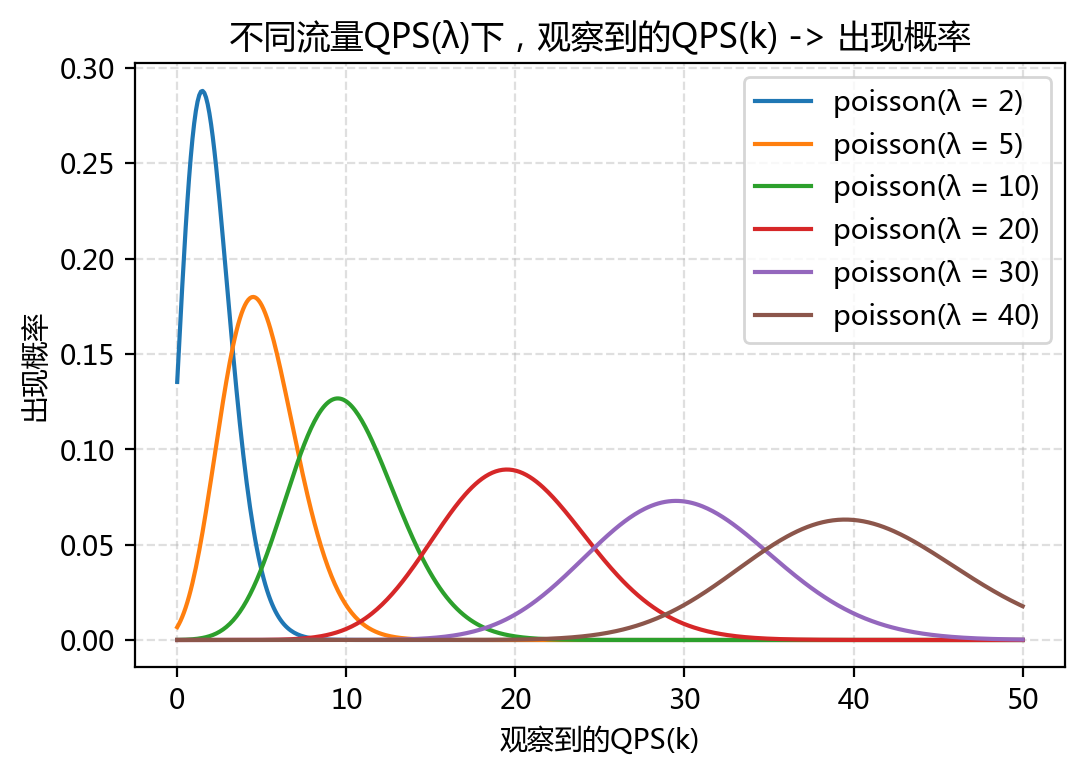

In [2]:
def plot_poisson_lambda(lmd, ks):
    plt.plot(ks, poisson(lmd=lmd, k=ks), label=f"poisson(λ = {lmd})")


def batch_plot_poisson_lambda(lmd_list, ks):
    for lmd in lmd_list:
        plot_poisson_lambda(lmd=lmd, ks=ks)


plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200

batch_plot_poisson_lambda(
    [2, 5, 10, 20, 30, 40],
    np.linspace(0, 50, 500)
)

plt.xlabel('观察到的QPS(k)')
plt.ylabel('出现概率')

plt.grid(alpha=.4, linestyle='--')

plt.title("不同流量QPS(λ)下，观察到的QPS(k) -> 出现概率")

plt.legend()

plt.show()

### 2.1.2 小流量`QPS`：$\lambda <= 2$

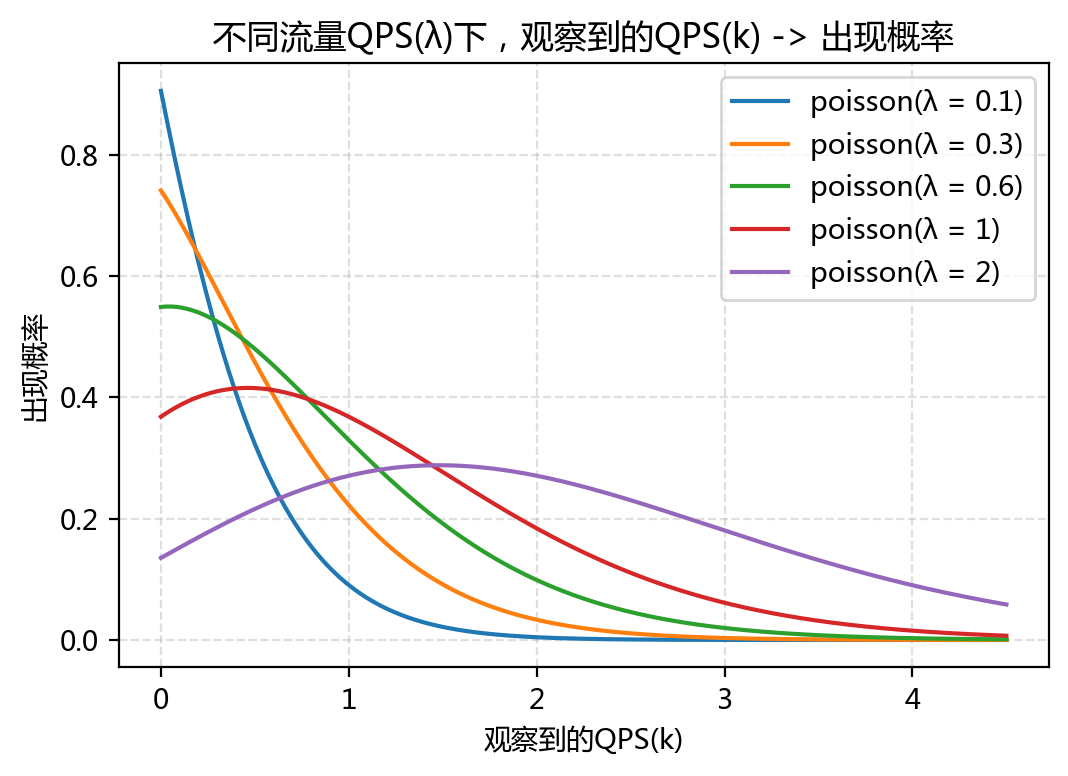

In [3]:
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200

batch_plot_poisson_lambda(
    [0.1, 0.3, 0.6, 1, 2],
    np.linspace(0, 4.5, 500)
)

plt.xlabel('观察到的QPS(k)')
plt.ylabel('出现概率')

plt.grid(alpha=.4, linestyle='--')

plt.title("不同流量QPS(λ)下，观察到的QPS(k) -> 出现概率")

plt.legend()

plt.show()

## 2.2 给定观察到的`QPS`($k$) 下，流量`QPS`($\lambda$) 与 出现概率 的关系

为了避免数据比例差异过大、小比例的部分图像被压扁而不能有效查看，分成2情况绘制函数图像：

- $K >= 5$
- $K <= 5$

### 2.2.1 $K >= 5$

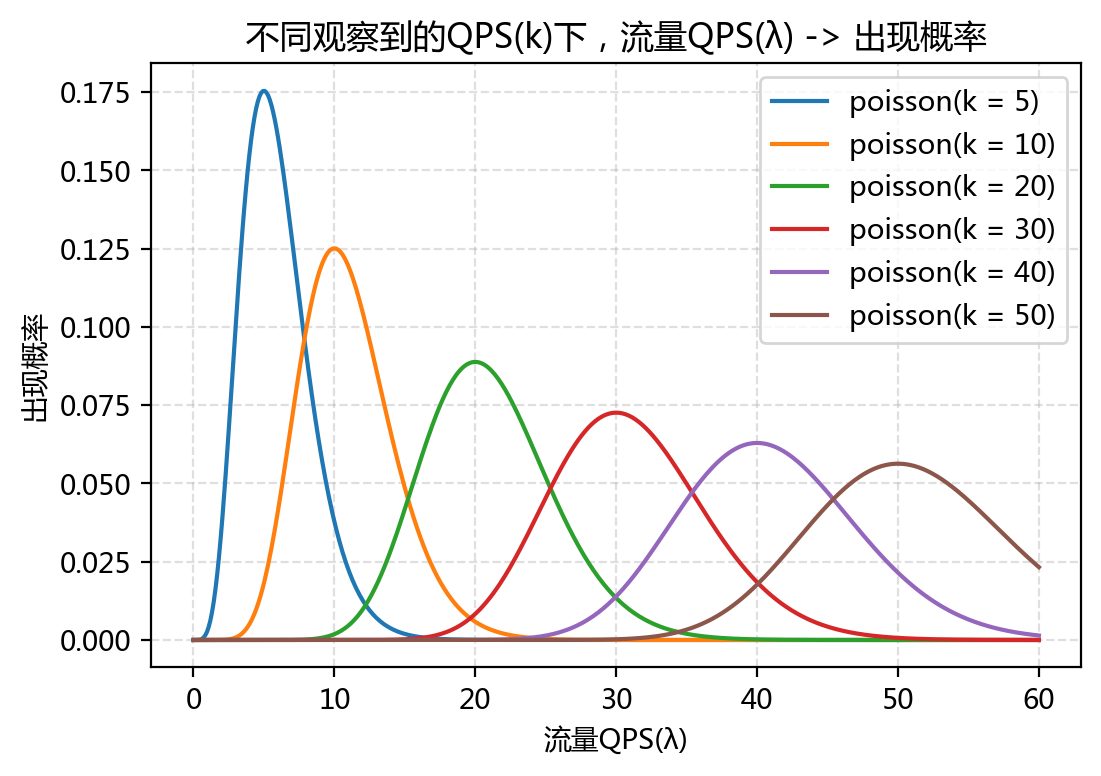

In [4]:
def plot_poisson_k(k, lmds):
    plt.plot(lmds, poisson(lmd=lmds, k=k), label=f"poisson(k = {k})")


def batch_plot_poisson_k(k_list, lmds):
    for k in k_list:
        plot_poisson_k(k, lmds)


plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200

batch_plot_poisson_k(
    [5, 10, 20, 30, 40, 50],
    np.linspace(0, 60, 500)
)

plt.xlabel('流量QPS(λ)')
plt.ylabel('出现概率')

plt.grid(alpha=.4, linestyle='--')

plt.title("不同观察到的QPS(k)下，流量QPS(λ) -> 出现概率")

plt.legend()

plt.show()

### 2.2.1 $K <= 5$

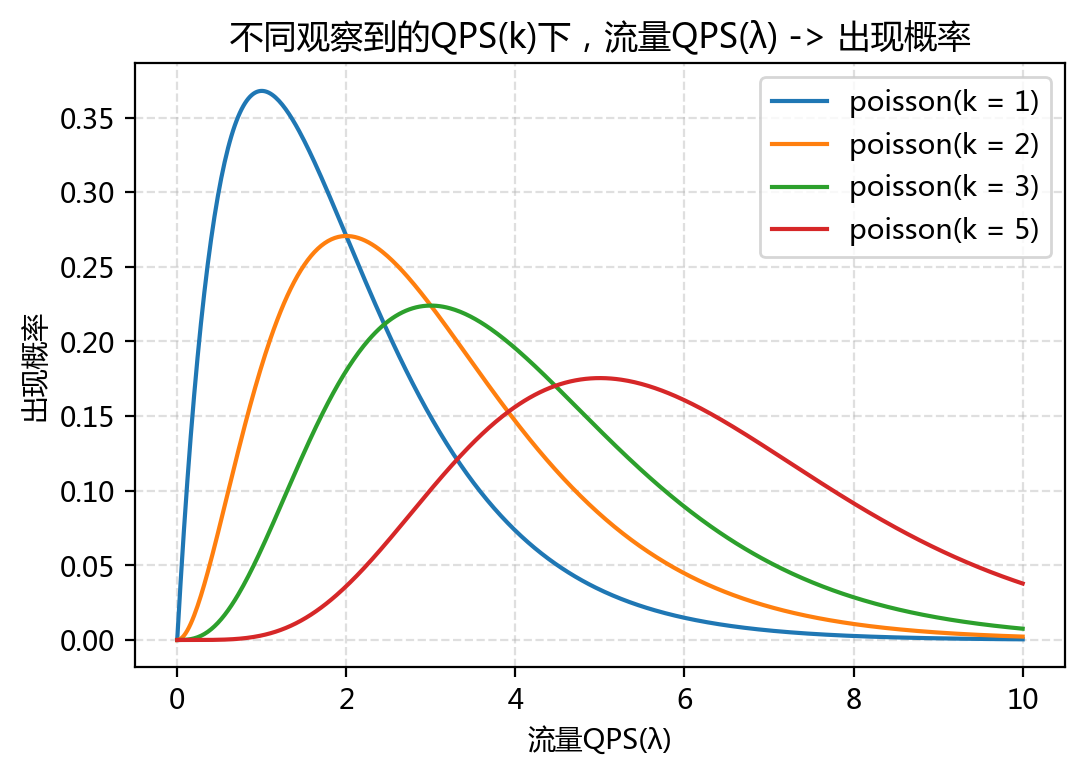

In [5]:
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200

batch_plot_poisson_k(
    [1, 2, 3, 5],
    np.linspace(0, 10, 500)
)

plt.xlabel('流量QPS(λ)')
plt.ylabel('出现概率')

plt.grid(alpha=.4, linestyle='--')

plt.title("不同观察到的QPS(k)下，流量QPS(λ) -> 出现概率")

plt.legend()

plt.show()

# 相关资料

## 概率与分布

- [泊松分布 - MBA智库百科](https://wiki.mbalib.com/wiki/%E6%B3%8A%E6%9D%BE%E5%88%86%E5%B8%83)
- [正态分布、泊松分布和伯努利分布 - CSDN博客](https://blog.csdn.net/weixin_42034505/article/details/81432385)
- 了解使用`scipy.stats.poisson`

## 数值/科学计算

- [Factorial of a matrix elementwise with Numpy](https://stackoverflow.com/questions/30879063)
- [numpy中矩阵乘法，星乘(*)和点乘(.dot)的区别 - CSDN博客](https://blog.csdn.net/like4501/article/details/79753346)